# Ettoday 網路爬蟲實作練習


* 能夠利用 Request + BeatifulSour 撰寫爬蟲，並存放到合適的資料結構


## 作業目標

根據範例：

* 取出今天所有的新聞
* 取出今天下午三點到五點的新聞
* 根據範例，取出三天前下午三點到五點的新聞

## 根據範例，取出今天所有的新聞

In [60]:
'''
Your Code
'''
from selenium import webdriver
from bs4 import BeautifulSoup


browser = webdriver.Chrome(executable_path = '/Users/da1ni2/Desktop/chromedriver')
browser.get('https://www.ettoday.net/news/news-list.htm')

<html itemscope="" itemtype="http://schema.org/WebSite" lang="zh-Hant" prefix="og:http://ogp.me/ns#" xmlns:wb="http://open.weibo.com/wb"><head><script async="" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=2&amp;r=https%3A%2F%2Fwww.ettoday.net%2Fnews%2Fnews-list.htm" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script async="" src="https://s0.2mdn.net/instream/video/client.js" type="text/javascript"></script><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20191205/r20190131/show_ads_impl.js"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_2019121002.js"></script><script async="" src="https://onead.onevision.com.tw/external.php?category=-1&amp;cookie=true&amp;uid=1000019&amp;ip=&amp;volume=0&amp;channel=21&amp;isip
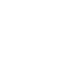
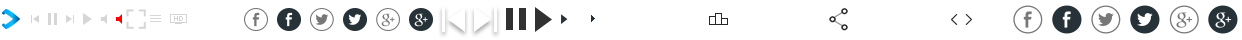
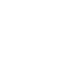
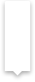
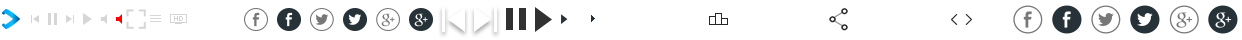

In [61]:
from selenium.webdriver.support.ui import Select
select_Year = Select(browser.find_element_by_id('selY'))
select_Year.select_by_value('2019')

select_Month = Select(browser.find_element_by_id('selM'))
select_Month.select_by_value('12')

select_Day = Select(browser.find_element_by_id('selD'))
select_Day.select_by_value('23')

browser.find_element_by_id('button').click()

import time
for i in range(50):
    browser.execute_script('window.scrollTo(0,100000)')
    time.sleep(1)

html = browser.page_source
html = BeautifulSoup(html , 'html5lib')
html

In [128]:
tag = html.find('div' , class_ = 'part_list_2').find_all('h3')

import time

for i in tag:
    date_p = time.strptime(i.find('span').text , '%Y/%m/%d %H:%M') 
    if (date_p[0] == 2019) & (date_p[1] == 12) & (date_p[2] == 23):
        date = i.find('span').text
        class_ = i.find('em').text
        title = i.find('a').text
        print(f'{date} 「{class_}」 {title}')


2019/12/23 16:41 「寵物動物」 巨嬰汪快轉「坐下→握手」搶攻零食！　媽傻眼笑場：自行解鎖
2019/12/23 16:40 「論壇」 【立院三讀】尤美女／拚起獄政改革重要的兩塊拼圖：《羈押法》及《監獄行刑法》
2019/12/23 16:38 「財經」 台指期正價差轉為逆價差　分析師：未來幾天震盪整理機率高
2019/12/23 16:37 「財經」 東森購物加碼新零售　打造跨境電商國際版圖挹注獲利
2019/12/23 16:35 「政治」 2014見過上海統戰部長？　賴清德駁斥：城市交流！不要打泥巴戰
2019/12/23 16:34 「政治」 質疑蔡英文「經濟20年來最好」　藍委搬出統計數字：睜眼說瞎話！
2019/12/23 16:31 「財經」 半導體高階製程需求升溫　11月電子零組件生產指數創史上新高
2019/12/23 16:31 「體育」 喬治首返雷霆主場獲溫暖歡迎　快艇舊將猛轟32分復仇上演18分逆轉
2019/12/23 16:30 「寵物動物」 偷啾一口！鸚鵡爽翻「狂扭小蠻腰」　歪頭再親一次繼續扭
2019/12/23 16:29 「旅遊」 古蹟＋觀光工廠一次參觀！嘉義免門票景點　還有飲料無限暢飲
2019/12/23 16:27 「國際」 CNN：北韓耶誕禮「放棄無核談判」對美強硬　坐看川普是否連任
2019/12/23 16:25 「體育」 共同設計新中華隊CT圖樣　吳志揚：未通過前使用舊CT
2019/12/23 16:24 「房產雲」 37歲單身男…怨父「那張嘴一直聒噪」！　立志買300萬小套房：想有私人空間
2019/12/23 16:22 「政治」 選戰倒數20天！林國春開始「站各大路口」道早　張宏陸度充實假日
2019/12/23 16:20 「寵物動物」 喵鑽德國牧羊犬懷裡趴下睡覺　暖心互動融化狗派奴才！
2019/12/23 16:19 「生活」 搶票激戰倒數！高鐵「2020春節車票」12/25開搶　全線加開424班次
2019/12/23 16:19 「國際」 澳洲野火燒出恐怖濃煙！他自製天氣預測圖　保護孕妻和未出生寶寶
2019/12/23 16:19 「社會」 熱戀18歲歐巴...國中妹跟回家壞2回！驗出「2條線」　他霸氣負責後又來一次
2019/12/23 16:17 「論壇」 【2020大選】薛承泰

## 取出今天下午三點到五點的新聞

In [131]:
'''
Your Code
'''
for i in tag:
    date_p = time.strptime(i.find('span').text , '%Y/%m/%d %H:%M') 
    if (date_p[0] == 2019) & (date_p[1] == 12) & (date_p[2] == 23) & ((date_p[3] == 15) or (date_p[3] == 16) or (date_p[3] == 17) ):
        date = i.find('span').text
        class_ = i.find('em').text
        title = i.find('a').text
        print(f'{date} 「{class_}」 {title}')


2019/12/23 16:41 「寵物動物」 巨嬰汪快轉「坐下→握手」搶攻零食！　媽傻眼笑場：自行解鎖
2019/12/23 16:40 「論壇」 【立院三讀】尤美女／拚起獄政改革重要的兩塊拼圖：《羈押法》及《監獄行刑法》
2019/12/23 16:38 「財經」 台指期正價差轉為逆價差　分析師：未來幾天震盪整理機率高
2019/12/23 16:37 「財經」 東森購物加碼新零售　打造跨境電商國際版圖挹注獲利
2019/12/23 16:35 「政治」 2014見過上海統戰部長？　賴清德駁斥：城市交流！不要打泥巴戰
2019/12/23 16:34 「政治」 質疑蔡英文「經濟20年來最好」　藍委搬出統計數字：睜眼說瞎話！
2019/12/23 16:31 「財經」 半導體高階製程需求升溫　11月電子零組件生產指數創史上新高
2019/12/23 16:31 「體育」 喬治首返雷霆主場獲溫暖歡迎　快艇舊將猛轟32分復仇上演18分逆轉
2019/12/23 16:30 「寵物動物」 偷啾一口！鸚鵡爽翻「狂扭小蠻腰」　歪頭再親一次繼續扭
2019/12/23 16:29 「旅遊」 古蹟＋觀光工廠一次參觀！嘉義免門票景點　還有飲料無限暢飲
2019/12/23 16:27 「國際」 CNN：北韓耶誕禮「放棄無核談判」對美強硬　坐看川普是否連任
2019/12/23 16:25 「體育」 共同設計新中華隊CT圖樣　吳志揚：未通過前使用舊CT
2019/12/23 16:24 「房產雲」 37歲單身男…怨父「那張嘴一直聒噪」！　立志買300萬小套房：想有私人空間
2019/12/23 16:22 「政治」 選戰倒數20天！林國春開始「站各大路口」道早　張宏陸度充實假日
2019/12/23 16:20 「寵物動物」 喵鑽德國牧羊犬懷裡趴下睡覺　暖心互動融化狗派奴才！
2019/12/23 16:19 「生活」 搶票激戰倒數！高鐵「2020春節車票」12/25開搶　全線加開424班次
2019/12/23 16:19 「國際」 澳洲野火燒出恐怖濃煙！他自製天氣預測圖　保護孕妻和未出生寶寶
2019/12/23 16:19 「社會」 熱戀18歲歐巴...國中妹跟回家壞2回！驗出「2條線」　他霸氣負責後又來一次
2019/12/23 16:17 「論壇」 【2020大選】薛承泰

## 根據範例，取出三天前下午三點到五點的新聞

In [132]:
'''
Your Code
'''
from selenium.webdriver.support.ui import Select
select_Year = Select(browser.find_element_by_id('selY'))
select_Year.select_by_value('2019')

select_Month = Select(browser.find_element_by_id('selM'))
select_Month.select_by_value('12')

select_Day = Select(browser.find_element_by_id('selD'))
select_Day.select_by_value('20')

browser.find_element_by_id('button').click()

import time

for i in range(40):
    browser.execute_script('window.scrollTo(0,100000)')
    time.sleep(1)

html = browser.page_source
html = BeautifulSoup(html , 'html5lib')


tag = html.find('div' , class_ = 'part_list_2').find_all('h3')
for i in tag:
    date_p = time.strptime(i.find('span').text , '%Y/%m/%d %H:%M') 
    if (date_p[0] == 2019) & (date_p[1] == 12) & (date_p[2] == 20) & ((date_p[3] == 15) or (date_p[3] == 16) or (date_p[3] == 17) ):
        date = i.find('span').text
        class_ = i.find('em').text
        title = i.find('a').text
        print(f'{date} 「{class_}」 {title}')


2019/12/20 17:58 「體育」 中職／彭政閔接班未來總教練　劉志威：找適當時間點
2019/12/20 17:58 「影劇」 蕭亞軒強勢回歸驚人樣貌曝光！　洩演唱會時間「明年生日起跑」
2019/12/20 17:56 「社會」 前夫尿布丟臉掰惹！名醫黃宥嘉再掀戰　討「超奢華珠寶盒+135萬現鈔」結果出爐
2019/12/20 17:55 「地方」 城市躲貓貓　林智堅邀請大小朋友來發掘動物的秘密基地
2019/12/20 17:55 「生活」 影／和尚用木魚敲「搖滾神曲」！魔性「咚咚~鏘」狂轟炸　一開口網全笑噴
2019/12/20 17:54 「體育」 拚東奧參賽門票　謝淑薇重返國家隊出征聯邦盃
2019/12/20 17:54 「政治」 批民進黨「東廠盡出」選舉支票滿天飛　傅崐萁：花蓮人不受恫嚇
2019/12/20 17:54 「寵物動物」 貓咪出院異瞳消失！　網友批「飼主抱錯」聽原因全安靜
2019/12/20 17:54 「消費」 金格新春推6款「開運新春禮盒」狂吸財運！風水師加碼：吃完留著放東南方「做金庫」
2019/12/20 17:52 「影劇」 「前世情人」帶財運　康康狂接尾牙春酒場開心進帳300萬
2019/12/20 17:51 「政治」 黃啓嘉競選總部成立　95歲老先生杵拐杖相挺：我一生忠黨愛國
2019/12/20 17:49 「政治」 高雄對決遊行將屆　激情男留言「帶傢伙來輸贏」警察找上門
2019/12/20 17:48 「地方」 輕稅有感！中市明年公告地價平均降2成　逾9成納稅戶少繳2千5
2019/12/20 17:48 「地方」  2019新竹冬景森林市集　歡迎市民共度悠閒週末時光
2019/12/20 17:47 「國際」 「雪颮」吞噬紐約街頭！能見度瞬間降　賓州連環車禍2死數十傷
2019/12/20 17:46 「房產雲」 有閒錢投資　選淡水還是基隆？網批：有錢就買蛋黃區
2019/12/20 17:45 「旅遊」 2019LOVE高雄追光季x商圈好SHOPPING　用LINE Pay最高享50%回饋
2019/12/20 17:43 「影劇」 黃少祺《炮仔聲》被狗籠狠K　跌坐畫面曝光…網嚇：超驚險！
2019/12/20 17:43 「國際」 買乳液抹僵硬屍體「加熱後性侵」！　日新潟女童案凶手殘忍犯行曝光
20